In [1]:
import pickle
import matplotlib.pyplot as plt
from pyscf import gto
import yaml
import numpy as np
import os

In [2]:
with open('config_densnet.yaml', 'r') as c:
    config = yaml.safe_load(c)
model_name = config['model_name']

In [3]:
files = os.listdir("logging")
rel_files = [f for f in files if model_name in f]
rel_files.sort()
#directory = "logging/20230810_165359_densnet_Ael8lbyb_md_h2.npz_densities_final"  # Fill this in
# Get latest run
directory = f"logging/{rel_files[-1]}/preds.npz"
pred_data = np.load("logging/20230810_165359_densnet_Ael8lbyb_md_h2.npz_densities_final/preds.npz", allow_pickle=True)
mol_data = np.load("data/md_h2.npz", allow_pickle=True)
num_ticks = config["num_ticks"]

In [4]:
show_idx = 0

In [5]:
coords = mol_data["coords"]
pred_density = pred_data["pred_densities"][show_idx]
pred_density = pred_density.reshape((num_ticks, num_ticks))

In [6]:
X = coords[:, 0]
X = X.reshape((num_ticks, num_ticks))
Y = coords[:, 1]
Y = Y.reshape((num_ticks, num_ticks))

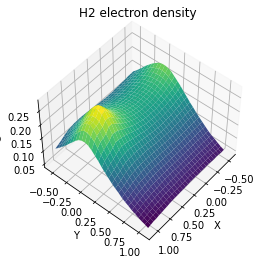

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, pred_density, cmap="viridis")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('ρ')
ax.set_title('H2 electron density')
ax.view_init(50, 40)
plt.show()